In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


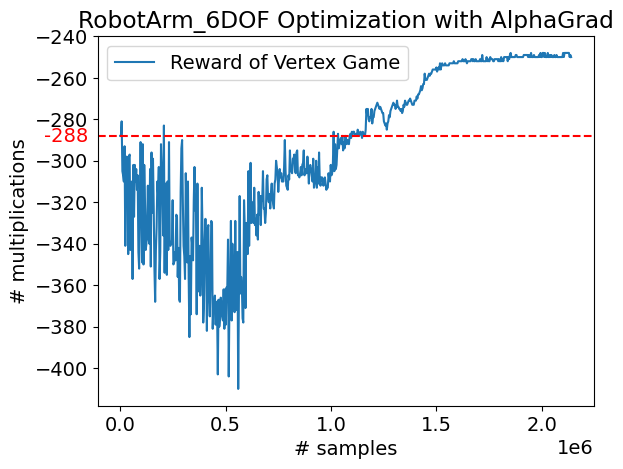

In [2]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 14}

plt.rc('font', **font)


data = np.genfromtxt("RobotArm_6DOF_A0_good_run.csv", delimiter=",", skip_header=1)
num_samples = data[:, 0]*32*108
num_muls = data[:, 1]

fig, ax = plt.subplots()
ax.plot(num_samples, num_muls, label="Reward of Vertex Game")
ax.axhline(y=-288., color='r', linestyle='--')
ax.set_xlabel("# samples")
ax.set_ylabel("# multiplications")
ax.set_title("RobotArm_6DOF Optimization with AlphaGrad")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,-288., "{:.0f}".format(-288.), color="red", transform=trans, 
        ha="right", va="center")
ax.legend()

In [2]:
import graphax
from graphax import jacve
from graphax.perf import plot_performance
from graphax.examples import RobotArm_6DOF

In [3]:
# 231 mults
order = [37, 18, 22, 41, 40, 8, 9, 101, 64, 36, 32, 61, 21, 14, 63, 2, 23, 82, 
        67, 7, 94, 15, 52, 49, 20, 97, 74, 93, 34, 77, 6, 31, 30, 104, 51, 103, 
        33, 105, 65, 76, 48, 45, 90, 44, 99, 95, 47, 46, 55, 73, 84, 29, 19, 79, 
        26, 57, 42, 43, 16, 92, 113, 112, 110, 53, 89, 35, 88, 107, 72, 70, 50, 
        71, 39, 83, 78, 111, 60, 58, 81, 38, 28, 5, 87, 108, 3, 91, 86, 109, 27, 
        54, 69, 25, 17, 106, 56, 10, 11, 75, 100, 1, 59, 98, 80, 4, 96, 13, 24, 12]

mM_order = [6, 7, 9, 10, 14, 18, 19, 21, 22, 53, 63, 64, 65, 67, 77, 78, 
            79, 80, 82, 94, 95, 96, 97, 99, 103, 104, 105, 107, 113, 2, 
            5, 8, 11, 17, 20, 23, 25, 27, 29, 30, 33, 35, 37, 38, 41, 43, 
            45, 46, 49, 50, 54, 55, 58, 59, 69, 71, 73, 74, 81, 84, 86, 
            88, 90, 91, 98, 101, 106, 109, 111, 26, 31, 34, 39, 42, 47, 
            51, 56, 60, 70, 75, 83, 87, 92, 100, 108, 110, 52, 61, 15, 
            28, 36, 44, 48, 57, 72, 1, 89, 13, 112, 3, 32, 40, 4, 16, 76, 
            93, 12, 24]

In [13]:

shape = (1256,)
key = jrand.PRNGKey(42)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
RobotArm_6DOF(*xs)

(Array([1165.378 , 1153.2665, 1117.2056, ..., 1124.6298, 1154.2109,
        1123.9711], dtype=float32),
 Array([10.905702  ,  8.178521  ,  0.45357376, ...,  1.9961499 ,
         8.388786  ,  1.8583584 ], dtype=float32),
 Array([-625.443  , -630.36707, -644.1941 , ..., -641.44836, -629.9883 ,
        -641.69403], dtype=float32),
 Array([0.0053214 , 0.00403754, 0.00023195, ..., 0.00101335, 0.00413757,
        0.00094401], dtype=float32),
 Array([3.0763795, 3.0921202, 3.1387455, ..., 3.129177 , 3.0908954,
        3.1300273], dtype=float32),
 Array([-3.108317 , -3.1163507, -3.140143 , ..., -3.1352592, -3.1157248,
        -3.1356926], dtype=float32))

  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 8792
2 : 2512
3 : 10048
4 : 10048
5 : 2512
6 : 1256
7 : 1256
8 : 2512
9 : 1256
10 : 1256
SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=1256, val_dim=0, other_id=1), SparseDimension(id=1, size=1256, val_dim=0, other_id=0))
SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(

  0%|          | 0/1000 [00:00<?, ?it/s]

113 : 1256
112 : 2512
111 : 2512
110 : 2512
109 : 2512
108 : 2512
SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=1256, val_dim=0, other_id=1), SparseDimension(id=1, size=1256, val_dim=0, other_id=0))
107 : 1256
106 : 2512
SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1,

  0%|          | 0/1000 [00:00<?, ?it/s]

6 : 1256
7 : 1256
9 : 1256
10 : 1256
14 : 1256
18 : 1256
19 : 1256
21 : 1256
22 : 1256
53 : 1256
63 : 1256
64 : 1256
SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=1256, val_dim=0, other_id=1), SparseDimension(id=1, size=1256, val_dim=0, other_id=0))
65 : 1256
67 : 1256
77 : 1256
78 : 1
79 : 1256
80 : 1256
82 : 1256
94 : 1256
95 : 1
96 : 1256
97 : 1256
99 : 1256
103 : 1256

  0%|          | 0/1000 [00:00<?, ?it/s]

37 : 2512
18 : 1256
22 : 1256
41 : 2512
40 : 3768
8 : 2512
9 : 1256
101 : 2512
64 : 1256
36 : 2512
32 : 2512
61 : 2512
21 : 1256
14 : 1256
63 : 1256
2 : 2512
23 : 2512
82 : 1256
67 : 1256
7 : 1256
94 : 1256
15 : 7536
52 : 2512
49 : 2512
SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (1256, 1256),
   out_dims = (SparseDimension(id=0, size=1256, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=1256, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[1256])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=1256, val_dim=0, other_id=1), SparseDimension(id=1, size=1256, val_dim=0, other_id=0))
20 :

100%|██████████| 1000/1000 [00:45<00:00, 22.01it/s]


fwd mean: 34.72284698486328, rev mean: 33.77657699584961, mM mean: 32.93220520019531, cc mean: 34.38548278808594
fwd err: [-2.168438  2.626175], rev err: [-3.0099201  2.1036682], mM err: [-4.3430786  3.4120445], cc err: [-4.707165   2.9853363]


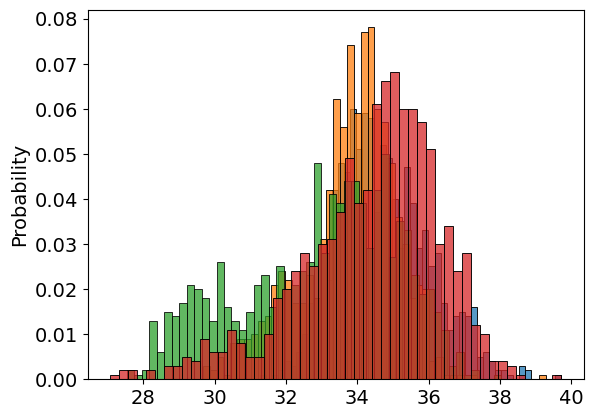

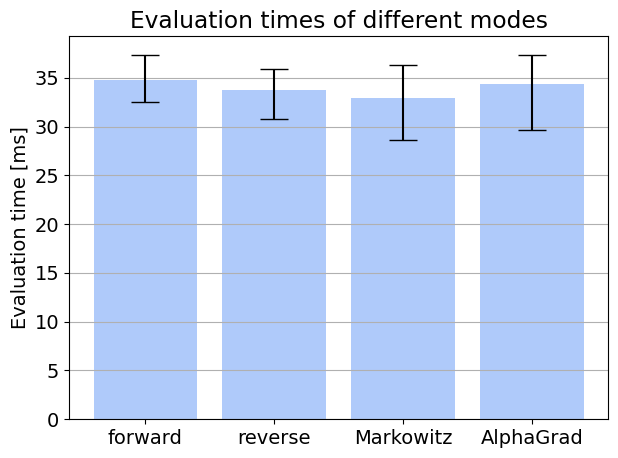

In [15]:
plot_performance(RobotArm_6DOF, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

### The best result yet
fwd mean: 0.13376061618328094, rev mean: 0.12299295514822006, mM mean: 0.12740099430084229, cc mean: 0.1195559874176979
fwd err: [-0.0022094   0.00508478], rev err: [-0.00505075  0.00332312], mM err: [-0.00290978  0.00470254], cc err: [-0.00524038  0.00420592]

fwd mean: 11.58597469329834, rev mean: 11.101419448852539, mM_mean: 10.998786926269531, cc_mean: 10.468031883239746, 
fwd std: 0.5178468823432922, rev std: 1.0373451709747314, mM_std: 1.0301194190979004, cc_std: 0.8663851618766785

fwd mean: 11.926535606384277, rev mean: 11.291781425476074, mM_mean: 11.579188346862793, cc_mean: 10.853036880493164, 
fwd std: 0.5759796500205994, rev std: 0.9990830421447754, mM_std: 0.8783360719680786, cc_std: 1.3300716876983643

fwd mean: 11.498019218444824, rev mean: 10.715002059936523, mM_mean: 10.045455932617188, cc_mean: 9.468513488769531, 
fwd std: 0.43519699573516846, rev std: 0.7234329581260681, mM_std: 0.27425265312194824, cc_std: 0.502721905708313

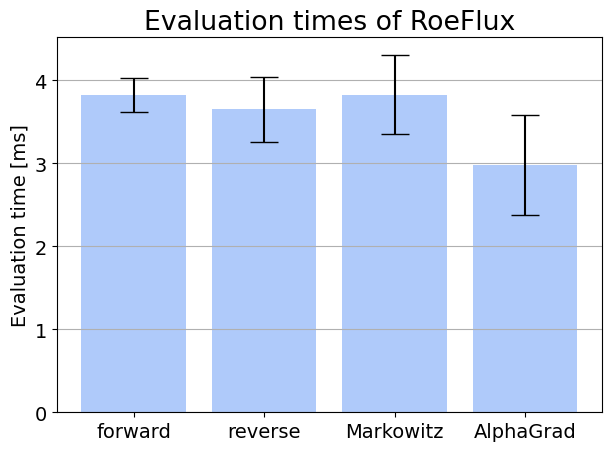

In [33]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()